# Exploratory data analysis and modelling

First, we will look at the distributions of features and relationships between them. 
After that we split the data, fit and optimize models and lastly sum up the results.


In [81]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# import missingno as msno
plt.style.use('ggplot')


In [82]:
# import cleaned dataset
df = pd.read_csv('data/houses_cleaned.csv')
# drop index column
df.drop('Unnamed: 0', axis=1, inplace=True)

In [83]:
# see the statictical summary of the numerical columns
df.describe().round(0)


,Price,SurfaceArea,YearBuilt,LandArea,YearRenovated
count,968.0,968.0,968.0,968.0,968.0
mean,213437.0,141.0,1903.0,218.0,717.0
std,117578.0,119.0,346.0,295.0,962.0
min,32000.0,0.0,0.0,0.0,0.0
25%,119000.0,62.0,1939.0,0.0,0.0
50%,190000.0,130.0,1979.0,0.0,0.0
75%,295500.0,196.0,2003.0,415.0,2003.0
max,499940.0,889.0,2023.0,999.0,2022.0


In [84]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968 entries, 0 to 967
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Price                 968 non-null    int64 
 1   SurfaceArea           968 non-null    int64 
 2   TotalRooms            632 non-null    object
 3   YearBuilt             968 non-null    int64 
 4   TotalFloors           404 non-null    object
 5   HouseMaterial         480 non-null    object
 6   HouseType             904 non-null    object
 7   LandArea              968 non-null    int64 
 8   YearRenovated         968 non-null    int64 
 9   Furniture             318 non-null    object
 10  ParkingSpots          310 non-null    object
 11  BalconyTerraceAtrium  315 non-null    object
 12  OutdoorFurniture      367 non-null    object
 13  EnergyClass           406 non-null    object
 14  Region                968 non-null    object
 15  District              968 non-null    ob

<AxesSubplot:xlabel='TotalRooms', ylabel='Count'>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

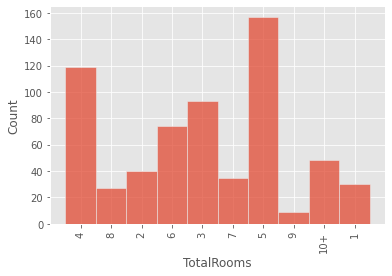

<AxesSubplot:xlabel='TotalFloors', ylabel='Count'>

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

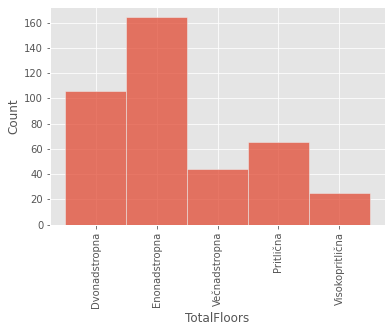

<AxesSubplot:xlabel='HouseMaterial', ylabel='Count'>

([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

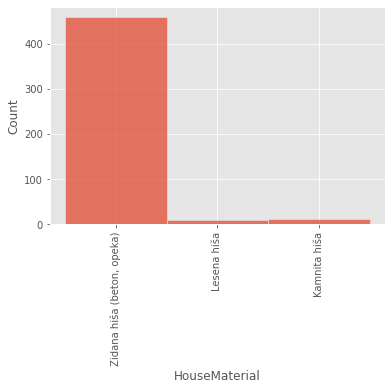

<AxesSubplot:xlabel='HouseType', ylabel='Count'>

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

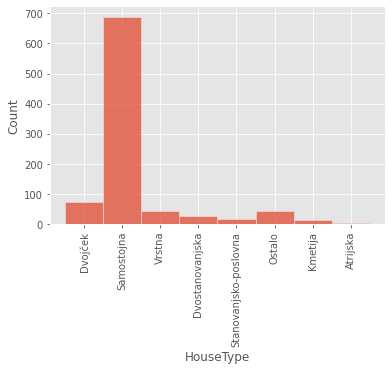

<AxesSubplot:xlabel='Furniture', ylabel='Count'>

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

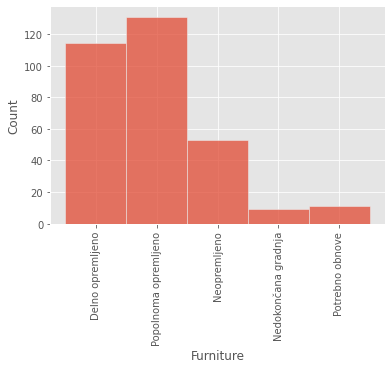

<AxesSubplot:xlabel='ParkingSpots', ylabel='Count'>

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

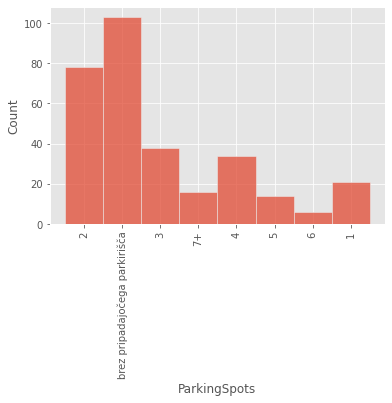

<AxesSubplot:xlabel='BalconyTerraceAtrium', ylabel='Count'>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

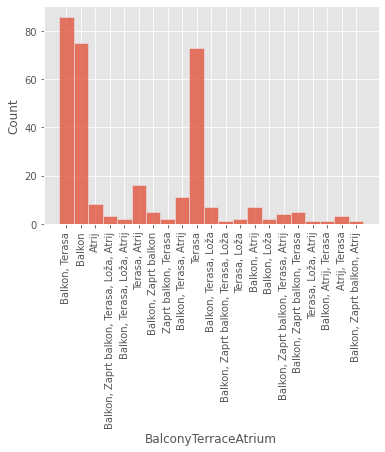

<AxesSubplot:xlabel='EnergyClass', ylabel='Count'>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

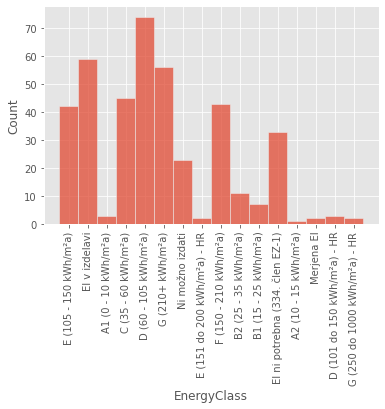

<AxesSubplot:xlabel='Region', ylabel='Count'>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

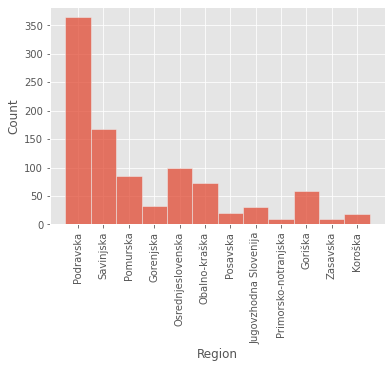

<Figure size 432x288 with 0 Axes>

In [85]:
for label in df.columns:
  if(df[label].dtype == 'object') and (len(list(df[label].unique())) <= 25):
    sns.histplot(data=df, x=label)
    # set labels
    plt.xticks(rotation = 90)
    #plt.tight_layout()
    # save img
    plt.rcParams.update({
    "figure.facecolor": "white",
    "figure.edgecolor": "white",
    "savefig.facecolor": "white",
    "savefig.edgecolor": "white"})

    plt.savefig('./img/houses_histogram_' + label + '.png', dpi=150, bbox_inches='tight')
    plt.show()
    plt.clf()

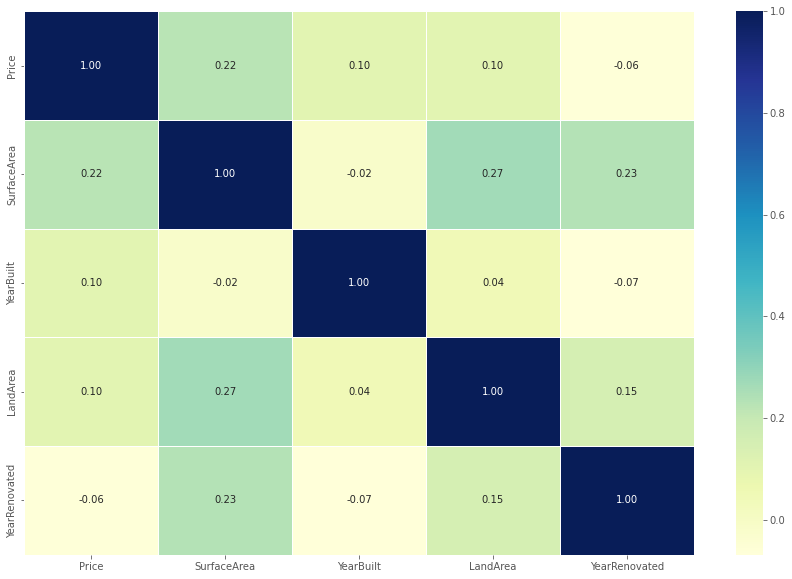

In [86]:
# create a correlation matrix
corr_matrix = df.corr()

# plot the correlation matrix
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                  annot=True,
                  linewidths=0.5,
                  fmt=".2f",
                  cmap="YlGnBu")
                    

In [87]:
# average price per m2
# df['PricePerM2'] = df['Price'] / df['SurfaceArea'].round(0)
# df['PricePerM2'].describe().round(0)


<AxesSubplot:xlabel='Price'>

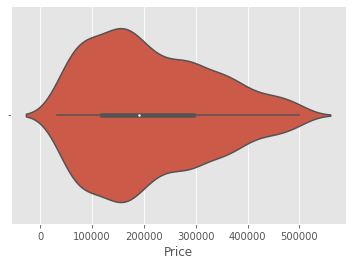

In [88]:
# plot price distribution
sns.violinplot(data=df, x='Price')



In [89]:
# price mean and median
df['Price'].mean().round(0)

213437.0

<AxesSubplot:xlabel='SurfaceArea', ylabel='Price'>

<AxesSubplot:xlabel='SurfaceArea', ylabel='Price'>

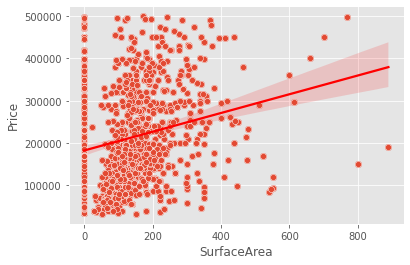

In [90]:
# scaterplot price and surface area with a regression line
sns.regplot(data=df, x='SurfaceArea', y='Price', line_kws={'color': 'red'})
sns.scatterplot(data=df, x='SurfaceArea', y='Price')

<AxesSubplot:xlabel='SurfaceArea', ylabel='Price'>

<AxesSubplot:xlabel='SurfaceArea', ylabel='Price'>

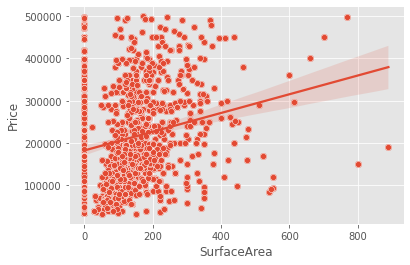

In [91]:
# regression and scatteršplot for price and surface area
sns.regplot(data=df, x='SurfaceArea', y='Price')
sns.scatterplot(data=df, x='SurfaceArea', y='Price')
# set labels


# Encode data, split dataframe and fit models

In [92]:
# import the models, metrics and cross validation
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
np.set_printoptions(precision=4)
import time
import shap

In [93]:
df.describe().round(0)

,Price,SurfaceArea,YearBuilt,LandArea,YearRenovated
count,968.0,968.0,968.0,968.0,968.0
mean,213437.0,141.0,1903.0,218.0,717.0
std,117578.0,119.0,346.0,295.0,962.0
min,32000.0,0.0,0.0,0.0,0.0
25%,119000.0,62.0,1939.0,0.0,0.0
50%,190000.0,130.0,1979.0,0.0,0.0
75%,295500.0,196.0,2003.0,415.0,2003.0
max,499940.0,889.0,2023.0,999.0,2022.0


In [94]:
# drop columns with more than 25% missing values
df.dropna(thresh=len(df)*0.25, axis=1, inplace=True)

<AxesSubplot:xlabel='YearBuilt', ylabel='Count'>

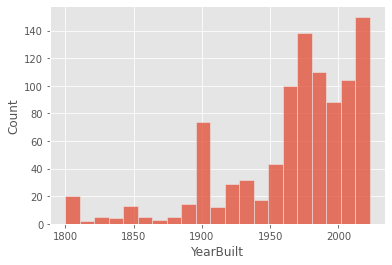

In [95]:
# if yearbuilt is below 1800, replace with the mean
for i in df['YearBuilt']: 
    if i < 1800:
        df['YearBuilt'].replace(i, df['YearBuilt'].mean(), inplace=True) 
#dist of yearbuilt
sns.histplot(data=df, x='YearBuilt')

<AxesSubplot:xlabel='Price', ylabel='Count'>

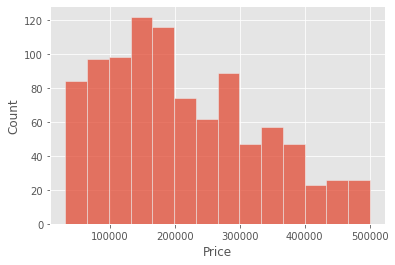

In [96]:
# show price distribution
sns.histplot(data=df, x='Price')


In [97]:
# calculate log price
# df['Price'] = np.log(df['Price'])


In [98]:
train, test = train_test_split(df, test_size=0.2, random_state = 1)

In [99]:
# impute categorical columns with LabelEncoder
def ImputeCategoricalFeatures(df):
    # Find the columns of object type along with their column index
    object_cols = list(df.select_dtypes(exclude=[np.int64,np.float64]).columns)
    object_cols_ind = []
    for col in object_cols:
        object_cols_ind.append(df.columns.get_loc(col))

    # Encode the categorical columns with numbers
    label_enc = LabelEncoder()
    encoders = {}
    
    
    for i in object_cols_ind:
        df.iloc[:,i] = label_enc.fit_transform(df.iloc[:,i])
        encoders[i] = label_enc
    return df

In [100]:
train_imp = ImputeCategoricalFeatures(train)
test_imp = ImputeCategoricalFeatures(test)

In [101]:
# split the data into X and y
X_train = train_imp.drop('Price', axis =1)
y_train = np.ravel(np.array(train_imp[['Price']]))
X_test = test_imp.drop('Price', axis =1)
y_test = np.ravel(np.array(test_imp[['Price']]))

In [102]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(774, 16)
(774,)
(194, 16)
(194,)


In [103]:
# define the valuation metrics
# mae
def mse(y_test, y_preds):
    return mean_squared_error(y_test, y_preds)

# rmse
def rmse(y_test, y_preds):
    return np.sqrt(mean_squared_error(y_test, y_preds))

# mape
def mape(y_test, y_preds):
    return np.mean(np.abs((y_test - y_preds) / y_test)) * 100

# R2
def r2(y_test, y_preds):
    return r2_score(y_test, y_preds)




In [104]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [105]:
# make a dict with all metrics
metrics = {'mse': mse,
            'rmse': rmse,
            'mape': mape,
            'r2': r2}
            

In [106]:
models = {'LinearRegression': LinearRegression(),
            'DecisionTreeRegressor': DecisionTreeRegressor(),
            'RandomForestRegressor': RandomForestRegressor(),
            }
            

In [107]:
# evaluate the model for train and test for each metric and return a df
def evaluate_model(model, X_train, y_train, X_test, y_test, metrics):
    # create a dict for the results
    results = {}
    results_test = {}
    # train the model
    model.fit(X_train, y_train)
    # predict the model
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    # evaluate the model for each metric
    results['model'] = model.__class__.__name__ + ' train' 
    for name, metric in metrics.items():
        results[name] = metric(y_train, y_train_pred) 

    results_test['model'] = model.__class__.__name__ + ' test'
    for name, metric in metrics.items():
        results_test[name] = metric(y_test, y_test_pred)
    
    pd_results_test = pd.DataFrame(results_test, index=[0])
    pd_results = pd.DataFrame(results, index=[0])

    # append results to a df and return it 
    results = pd.concat([pd_results,pd_results_test], axis=0, ignore_index=True)
    
    return results

# Linear regression


In [108]:
%%time
ln_model = LinearRegression()
kf = KFold(n_splits=5)
y_pred_rf = cross_val_score(ln_model, X_train, y_train, cv=kf, n_jobs=-1)
print(y_pred_rf.mean())
print(y_pred_rf)

0.17500390642662617
[0.1237 0.2426 0.106  0.2857 0.117 ]
CPU times: total: 0 ns
Wall time: 11 ms


In [109]:
evaluate_model(ln_model, X_train, y_train, X_test, y_test, metrics).round(2)

,model,mse,rmse,mape,r2
0,LinearRegression train,1.087415e+10,104279.19,59.68,0.23
1,LinearRegression test,1.126052e+10,106115.60,72.44,0.08


In [110]:
# for model in model evaluate the model
results = pd.DataFrame()
for name, model in models.items():
    results = pd.concat([results,evaluate_model(model, X_train, y_train, X_test, y_test, metrics)], axis=0, ignore_index=True)
results.round(2)

,model,mse,rmse,mape,r2
0,LinearRegression train,1.087415e+10,104279.19,59.68,0.23
1,LinearRegression test,1.126052e+10,106115.60,72.44,0.08
2,DecisionTreeRegressor train,5.775258e+06,2403.18,0.11,1.00
3,DecisionTreeRegressor test,1.239698e+10,111341.74,49.94,-0.01
4,RandomForestRegressor train,1.232477e+09,35106.65,17.92,0.91
5,RandomForestRegressor test,7.657431e+09,87506.75,52.54,0.37


Decision tree regression

In [111]:
%%time
dt_model = DecisionTreeRegressor(random_state=1)

kf = KFold(n_splits=5)
y_pred_rf = cross_val_score(dt_model, X_train, y_train, cv=kf, n_jobs=-1)
print(y_pred_rf.mean())
print(y_pred_rf)

-0.24111566534557155
[-0.4632  0.0449  0.0016 -0.2386 -0.5503]
CPU times: total: 0 ns
Wall time: 13.8 ms


In [112]:
%%time
dt_model.fit(X_train, y_train)
y_train_pred_rf = dt_model.predict(X_train)

print('train R2: ' + str(r2(y_train, y_train_pred_rf)))

y_test_pred_rf = dt_model.predict(X_test)
print('test R2: ' + str(r2(y_test, y_test_pred_rf)))
dt_model.get_params()

train R2: 0.9995924502427856
test R2: -0.13075820828090734
CPU times: total: 0 ns
Wall time: 9 ms


{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1,
 'splitter': 'best'}

<BarContainer object of 16 artists>

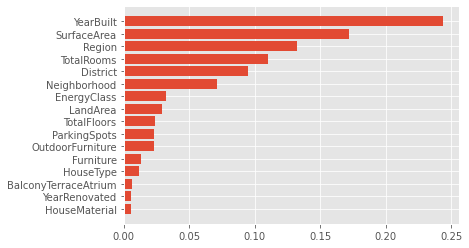

In [113]:
sorted_idx = dt_model.feature_importances_.argsort()
plt.barh(list(X_test.columns[sorted_idx]), dt_model.feature_importances_[sorted_idx])

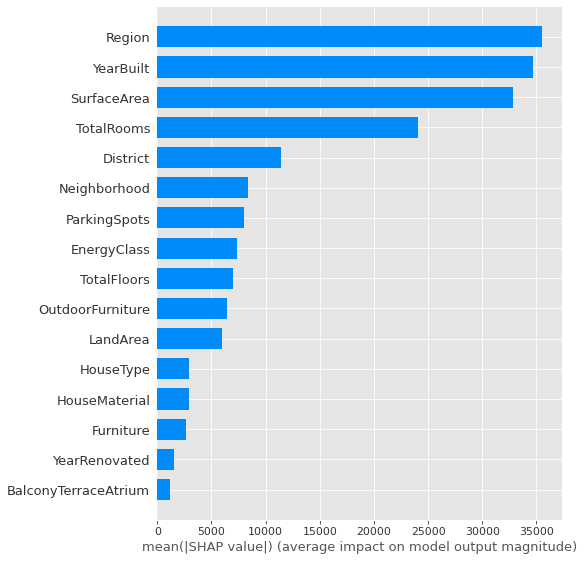

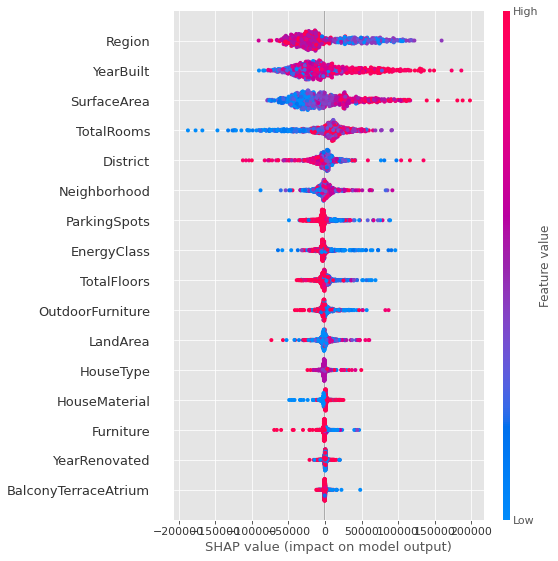

In [114]:
explainer = shap.TreeExplainer(dt_model)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")
shap.summary_plot(shap_values, X_train)

In [115]:
# Create the parameter grid based on the results of random for decision tree
param_grid = {
    'max_depth': [int(x) for x in np.linspace(5, 25, num = 20)],
    'min_samples_split': [ 2, 5, 8, 10, 12],
    'min_samples_leaf': [ 4, 6, 8, 10,12],
    'max_features': [ 1.0,'sqrt', 'log2']
}

# Create a base model
dt = DecisionTreeRegressor(random_state = 1)

# Instantiate the grid search model
grid_search_dt = GridSearchCV(estimator = dt, param_grid = param_grid, scoring='neg_mean_squared_log_error',
                          cv = 5, n_jobs = -1, verbose = 2, return_train_score=True)

In [116]:
# Fit the grid search to the data

grid_search_dt.fit(X_train,y_train)

Fitting 5 folds for each of 1500 candidates, totalling 7500 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                       16, 17, 18, 19, 20, 21, 22, 23, 25],
                         'max_features': [1.0, 'sqrt', 'log2'],
                         'min_samples_leaf': [4, 6, 8, 10, 12],
                         'min_samples_split': [2, 5, 8, 10, 12]},
             return_train_score=True, scoring='neg_mean_squared_log_error',
             verbose=2)

In [117]:
dt_best = grid_search_dt.best_estimator_.fit(X_train, y_train)
y_pred_dt_best = dt_best.predict(X_train)

y_train_pred_dt_best = dt_best.predict(X_train)
print('train R2: ' + str(r2(y_train, y_train_pred_dt_best)))


y_test_pred_dt_best = dt_best.predict(X_test)
print('test R2: ' + str(r2(y_test, y_test_pred_dt_best)))

train R2: 0.5469552951740684
test R2: 0.17431786520994397


In [118]:
evaluate_model(dt_best, X_train, y_train, X_test, y_test, metrics).round(2)

,model,mse,rmse,mape,r2
0,DecisionTreeRegressor train,6.419953e+09,80124.61,39.98,0.55
1,DecisionTreeRegressor test,1.010746e+10,100535.88,60.77,0.17


<BarContainer object of 16 artists>

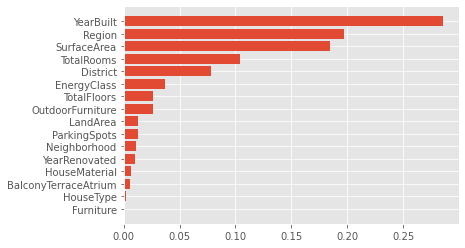

In [119]:
sorted_idx = dt_best.feature_importances_.argsort()
plt.barh(list(X_test.columns[sorted_idx]), dt_best.feature_importances_[sorted_idx])

In [120]:
dt_best_params = grid_search_dt.best_params_
dt_best_params


{'max_depth': 10,
 'max_features': 1.0,
 'min_samples_leaf': 12,
 'min_samples_split': 2}

Random Forest regressor

In [121]:
%%time
rf_model = RandomForestRegressor(#n_estimators=300,
                                      #max_depth=10,
                                      #min_samples_split=5,
                                      #min_samples_leaf=5,
                                      #max_features=None,
                                      random_state=1,
                                      #oob_score=True
                                      criterion='mse',
                                     )
kf = KFold(n_splits=5)
y_pred_rf = cross_val_score(rf_model, X_train, y_train, cv=kf, n_jobs=-1)
print(y_pred_rf.mean())
print(y_pred_rf)

0.354859112024701
[0.2844 0.5375 0.3009 0.2812 0.3702]
CPU times: total: 0 ns
Wall time: 278 ms


In [122]:
%%time
rf_model.fit(X_train, y_train)
y_train_pred_rf = rf_model.predict(X_train)

print('train R2: ' + str(r2(y_train, y_train_pred_rf)))

y_test_pred_rf = rf_model.predict(X_test)
print('test R2: ' + str(r2(y_test, y_test_pred_rf)))
rf_model.get_params()

Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.


train R2: 0.9139675675462874
test R2: 0.37739158741214984
CPU times: total: 281 ms
Wall time: 285 ms


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

<BarContainer object of 16 artists>

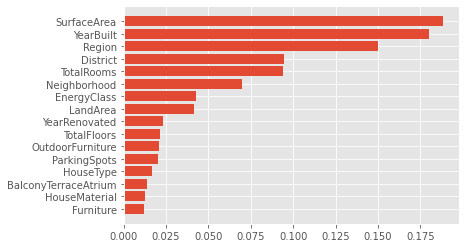

In [123]:
sorted_idx = rf_model.feature_importances_.argsort()
plt.barh(list(X_test.columns[sorted_idx]), rf_model.feature_importances_[sorted_idx])

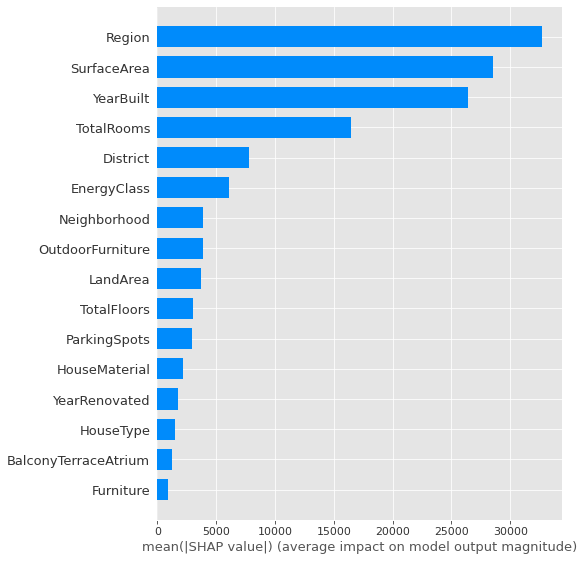

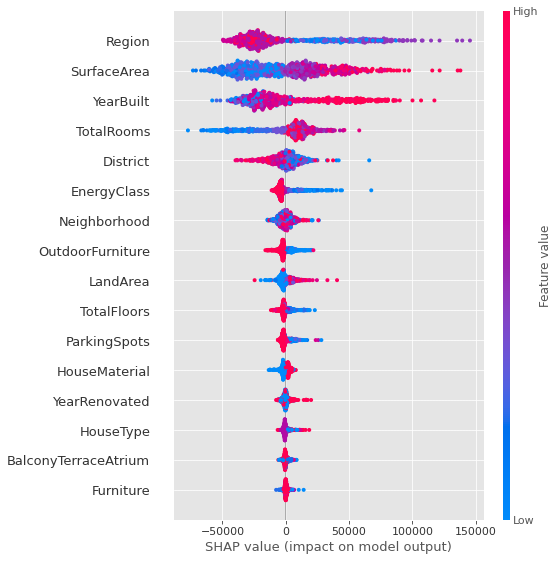

In [124]:
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")
shap.summary_plot(shap_values, X_train)

In [125]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [8, 9, 10, 11],
    'max_features': [7, 8, 9, 10],
    'min_samples_leaf': [2, 3, 4, 5],
    'min_samples_split': [5, 6, 8,], 
    'n_estimators': [50, 60, 70, 80]
}

# Create a base model
rf = RandomForestRegressor(random_state = 1)

# Instantiate the grid search model
grid_search_rf = GridSearchCV(estimator = rf, param_grid = param_grid, scoring='neg_mean_squared_log_error',
                          cv = 5, n_jobs = -1, verbose = 2, return_train_score= False)

In [126]:
# Fit the grid search to the data
grid_search_rf.fit(X_train,y_train)

Fitting 5 folds for each of 768 candidates, totalling 3840 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [8, 9, 10, 11],
                         'max_features': [7, 8, 9, 10],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [5, 6, 8],
                         'n_estimators': [50, 60, 70, 80]},
             scoring='neg_mean_squared_log_error', verbose=2)

In [127]:
rf_best = grid_search_rf.best_estimator_.fit(X_train, y_train)
y_pred_rf_best = rf_best.predict(X_train)

y_train_pred_rf_best = rf_best.predict(X_train)
print('train R2: ' + str(r2(y_train, y_train_pred_rf_best)))

y_test_pred_rf_best = rf_best.predict(X_test)
print('test R2: ' + str(r2(y_test, y_test_pred_rf_best)))

train R2: 0.7499521235626374
test R2: 0.38686563927902284


In [128]:
evaluate_model(rf_best, X_train, y_train, X_test, y_test, metrics).round(2)

,model,mse,rmse,mape,r2
0,RandomForestRegressor train,3.543349e+09,59526.04,30.18,0.75
1,RandomForestRegressor test,7.505592e+09,86634.82,52.14,0.39


In [129]:
rf_best_params = grid_search_rf.best_params_
rf_best_params


{'bootstrap': True,
 'max_depth': 11,
 'max_features': 8,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 70}

Text(0.5, 0, 'Actual price')

Text(0, 0.5, 'MAPE')

Text(0.5, 1.0, ' Percentage error at different prices')

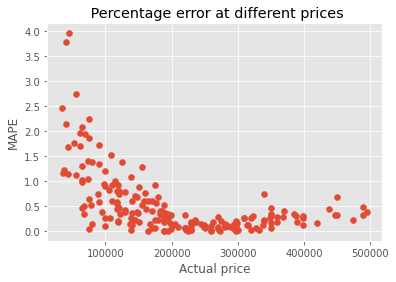

In [147]:
# make a scatterplot of predicted vs actual
plt.scatter(y_test, abs(y_test_pred_rf_best - y_test)/y_test)
plt.xlabel('Actual price')
plt.ylabel('MAPE')
plt.title(' Percentage error at different prices')
plt.show() 

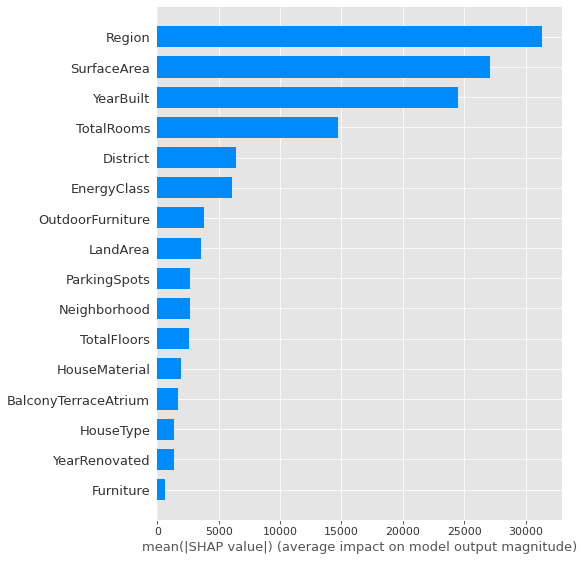

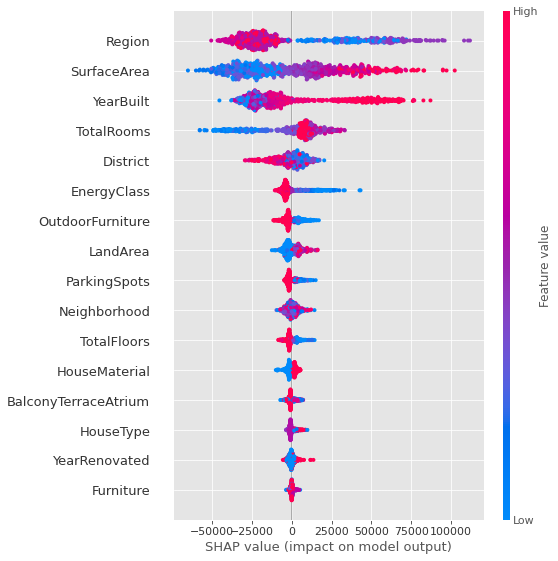

In [131]:
explainer = shap.TreeExplainer(rf_best)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")
shap.summary_plot(shap_values, X_train)

In [132]:
from xgboost import XGBRegressor


In [133]:
%%time
xgboost_model = XGBRegressor(#learning_rate=0.01,
                         #n_estimators=1000,
                         #max_depth=4, min_child_weight=1,
                         #gamma=0.6, subsample=0.7,
                         #colsample_bytree=0.2,
                         #nthread=-1,
                         #scale_pos_weight=1, seed=27,
                         #reg_alpha=0.001
                       )

kf = KFold(n_splits=5)
y_pred_xgboost = cross_val_score(xgboost_model, X_train, y_train, cv=kf, n_jobs=-1)
print(y_pred_xgboost.mean())
print(y_pred_xgboost)
                        
# https://towardsdatascience.com/doing-xgboost-hyper-parameter-tuning-the-smart-way-part-1-of-2-f6d255a45dde
                            


0.2822370373038813
[0.2368 0.4892 0.231  0.2126 0.2416]
CPU times: total: 15.6 ms
Wall time: 148 ms


In [134]:
%time
xgboost_model.fit(X_train, y_train)

y_train_pred_xgboost = xgboost_model.predict(X_train)
print('train R2: ' + str(r2(y_train, y_train_pred_xgboost)))

y_test_pred_xgboost = xgboost_model.predict(X_test)
print('test R2: ' + str(r2(y_test, y_test_pred_xgboost)))

CPU times: total: 0 ns
Wall time: 0 ns


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

train R2: 0.9987054830921027
test R2: 0.3019978372208507


In [135]:
from sklearn.model_selection import GridSearchCV


<BarContainer object of 16 artists>

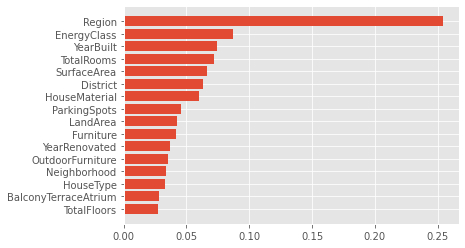

In [136]:

sorted_idx = xgboost_model.feature_importances_.argsort()
plt.barh(list(X_test.columns[sorted_idx]), xgboost_model.feature_importances_[sorted_idx])

In [137]:
                            
param_grid = {
    'learning_rate': [0.005, 0.010, 0.02, 0.05],
    #'min_child_weight':[1,2,3],
    #"gamma"        : [ 0.1, 0.2 , 0.3],
    "colsample_bytree" : [ 0.2, 0.3],
    'max_depth': [2,3,4, 5,],
    'max_features': [4,5],
    'n_estimators': [300, 500, 700, 1000]
}

# Create a base model
xgboost_model = XGBRegressor(random_state = 1)

# Instantiate the grid search model
grid_search_xgboost = GridSearchCV(estimator = xgboost_model, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)

In [138]:
# Fit the grid search to the data
grid_search_xgboost.fit(X_train,y_train)

Fitting 3 folds for each of 256 candidates, totalling 768 fits
[22:50:25] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=1,
                                    reg_alpha=None, reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.2, 0.3],
                         'learning_rate': [0.005, 0.01, 0.02, 0.05],
                         'max_depth': [2, 3, 4, 5], 'max_features': [4, 5],
                         'n_estimators': [300, 500, 700, 1000]},
             return_train_score=True, verbose=2)

In [139]:
xgboost_best_par = grid_search_xgboost.best_params_
xgboost_best_par

{'colsample_bytree': 0.2,
 'learning_rate': 0.01,
 'max_depth': 5,
 'max_features': 4,
 'n_estimators': 1000}

In [140]:
#Evaluation of the best model
xgboost_best = grid_search_xgboost.best_estimator_.fit(X_train, y_train)
y_pred_xgboost_best = xgboost_best.predict(X_train)

y_train_pred_xgboost_best = xgboost_best.predict(X_train)
print('train R2: ' + str(r2(y_train, y_train_pred_xgboost_best)))

y_test_pred_xgboost_best = xgboost_best.predict(X_test)
print('test R2: ' + str(r2(y_test, y_test_pred_xgboost_best)))

[22:50:26] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


train R2: 0.8411887801129982
test R2: 0.3907652268308871


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


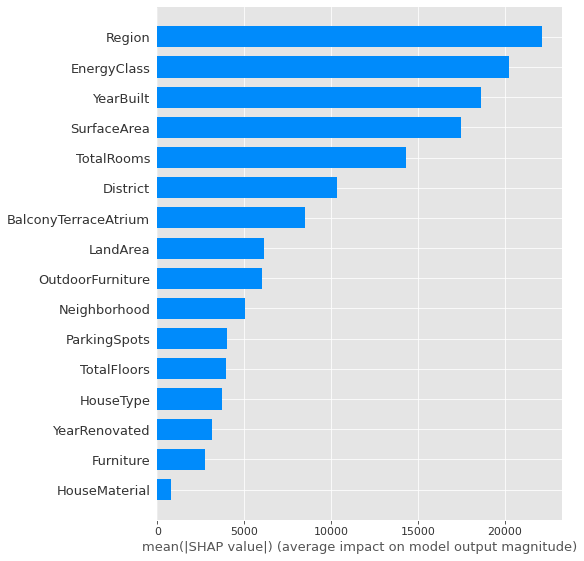

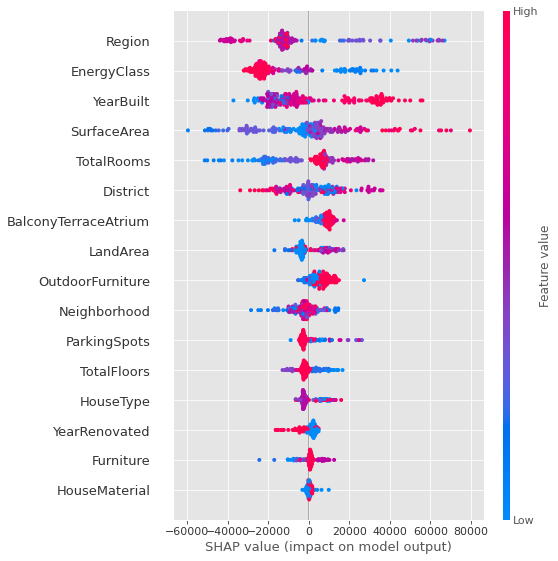

In [141]:
explainer = shap.TreeExplainer(xgboost_best)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test,  plot_type="dot")

In [142]:
evaluate_model(xgboost_best, X_train, y_train, X_test, y_test, metrics).round(2)

[22:50:28] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




,model,mse,rmse,mape,r2
0,XGBRegressor train,2.250463e+09,47439.05,23.83,0.84
1,XGBRegressor test,7.457856e+09,86358.88,54.22,0.39


In [143]:
# concat all evaluate models dfs in one
df = pd.concat([evaluate_model(dt_best, X_train, y_train, X_test, y_test, metrics).round(2),
                evaluate_model(rf_best, X_train, y_train, X_test, y_test, metrics).round(2),
                evaluate_model(xgboost_best, X_train, y_train, X_test, y_test, metrics).round(2)], axis=0)
df

[22:50:28] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




,model,mse,rmse,mape,r2
0,DecisionTreeRegressor train,6.419953e+09,80124.61,39.98,0.55
1,DecisionTreeRegressor test,1.010746e+10,100535.88,60.77,0.17
0,RandomForestRegressor train,3.543349e+09,59526.04,30.18,0.75
1,RandomForestRegressor test,7.505592e+09,86634.82,52.14,0.39
0,XGBRegressor train,2.250463e+09,47439.05,23.83,0.84
1,XGBRegressor test,7.457856e+09,86358.88,54.22,0.39


In [144]:
# with test 0.25 # 					model	mse						rmse			mape	r2
## 0	DecisionTreeRegressor train	2.907857e+09	53924.55	24.06	0.74
## 1	DecisionTreeRegressor test	4.817951e+09	69411.46	32.31	0.57
## 0	RandomForestRegressor train	1.050790e+09	32415.89	14.80	0.91
## 1	RandomForestRegressor test	3.727688e+09	61054.80	25.71	0.67
## 0	XGBRegressor train					1.079715e+09	32859.01	14.45	0.90
## 1	XGBRegressor test						5.294185e+09	72761.15	30.99	0.53

In [76]:
# with test 0.3 # model	mse	rmse	mape	r2
# 0	DecisionTreeRegressor train	2.506214e+09	50062.10	22.18	0.77
# 1	DecisionTreeRegressor test	4.722270e+09	68718.77	33.21	0.59
# 0	RandomForestRegressor train	9.754600e+08	31232.36	14.00	0.91
# 1	RandomForestRegressor test	3.382692e+09	58160.92	26.66	0.70
# 0	XGBRegressor train	1.029493e+09	32085.71	13.93	0.91
# 1	XGBRegressor test	4.767636e+09	69048.07	30.27	0.58